<a href="https://colab.research.google.com/github/Imyongjunn/Oss25/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_%EC%A7%91%EA%B0%92%EC%98%88%EC%B8%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

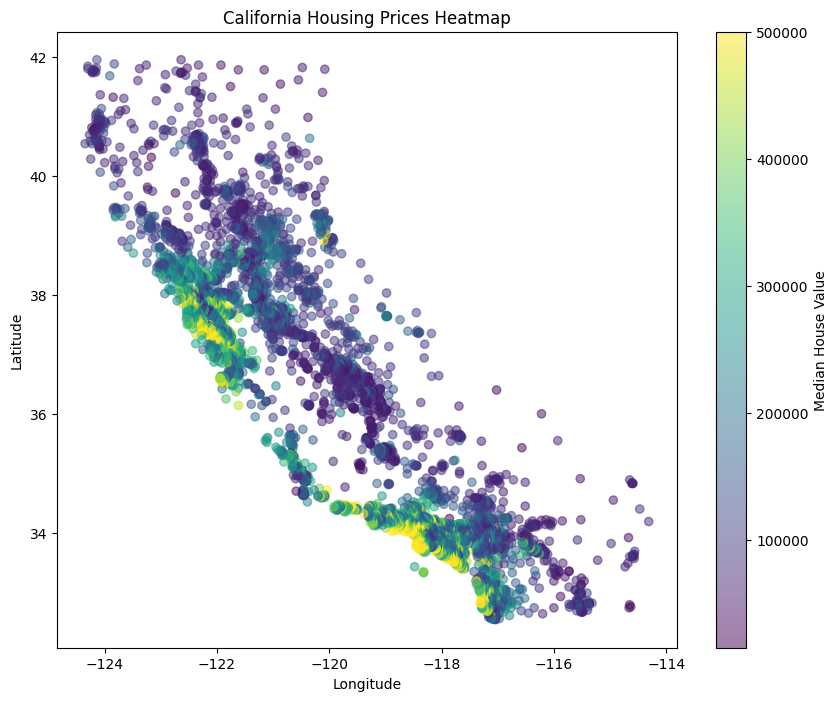

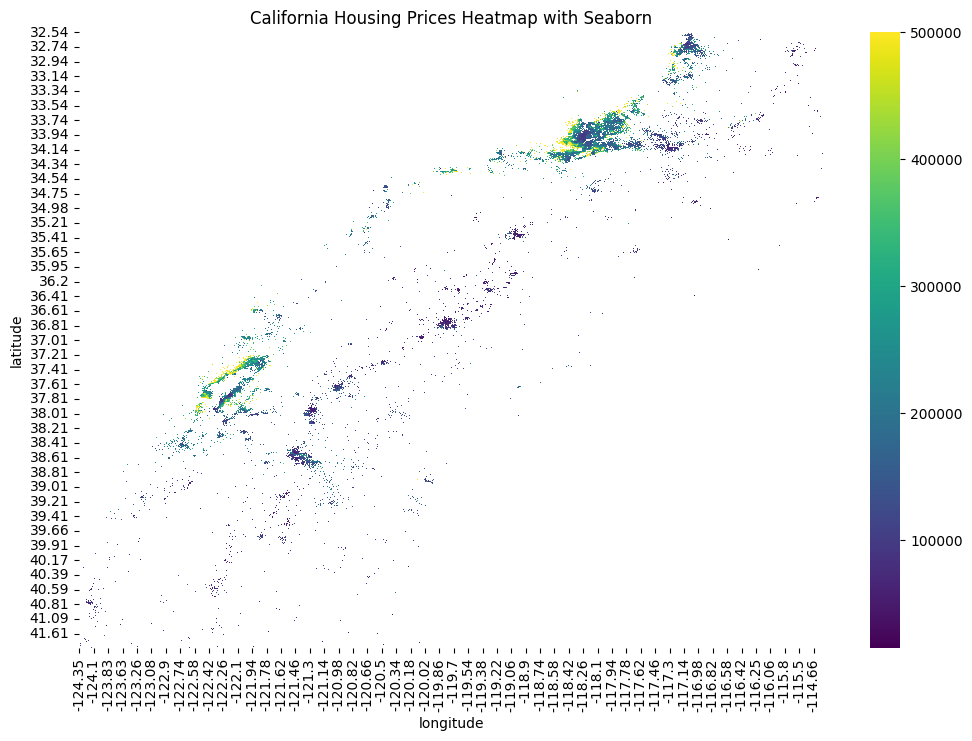

In [10]:
# prompt: /content/sample_data/california_housing_train.csv 데이터로부터 집 값을 예측하는 코드로 집 값을 위도 경도로 구분하여 가시성이 좋은 차트와 지도가 있는 히트맵을  만들어주세요

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 로드
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

# 위도, 경도, 집값으로 데이터프레임 생성
data = df[['latitude', 'longitude', 'median_house_value']]

# 히트맵 생성을 위한 준비
latitude = data['latitude'].values
longitude = data['longitude'].values
median_house_value = data['median_house_value'].values

# 히트맵 그리기
plt.figure(figsize=(10, 8))
plt.scatter(longitude, latitude, c=median_house_value, cmap='viridis', alpha=0.5)
plt.colorbar(label='Median House Value')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('California Housing Prices Heatmap')
plt.show()


# seaborn을 이용한 히트맵
plt.figure(figsize=(12, 8))
sns.heatmap(data.pivot_table(values='median_house_value', index='latitude', columns='longitude'), cmap='viridis')
plt.title('California Housing Prices Heatmap with Seaborn')
plt.show()


try:
  import gmaps
  # Google Maps API 키 설정 (필요에 따라 수정)
  gmaps.configure(api_key='YOUR_GOOGLE_MAPS_API_KEY') # 여기에 API 키를 넣어주세요.

  # 데이터 전처리
  locations = data[['latitude', 'longitude']]
  weights = data['median_house_value']

  # 히트맵 생성
  fig = gmaps.figure()
  heatmap_layer = gmaps.heatmap_layer(locations, weights=weights)
  fig.add_layer(heatmap_layer)
  fig

except ImportError:
    print("gmaps 라이브러리가 설치되지 않았습니다. 설치 후 다시 실행해주세요.")
    print("설치 방법: !pip install gmaps")

except Exception as e:
  print(f"오류 발생: {e}")
